In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

In [2]:
car= pd.DataFrame(pd.read_csv("C:/Users/HP/Downloads/car data.csv"))
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

In [4]:
car.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [5]:
car.shape

(301, 9)

In [6]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Checking for missing values
car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
##check duplicate values
car_dup=car.duplicated().any()
car_dup

True

In [10]:
##true means our dataset is having duplicate values

In [11]:
car=car.drop_duplicates()
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
##check duplicate values
car_dup=car.duplicated().any()
car_dup

False

In [13]:
##no duplicate values

In [14]:
##target variable
car.Selling_Price.value_counts()

0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price', ylabel='count'>

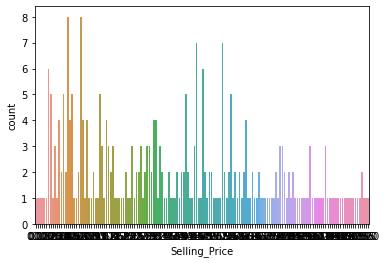

In [15]:
sns.countplot(car['Selling_Price'])

# categorical variables

In [16]:
car_categorical=car.loc[:,car.dtypes== object]
car_categorical

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


# numerical features

In [17]:
car_numerical = car.select_dtypes(exclude=[object])
car_numerical

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


# Visualizing categorical column with bar plot

<AxesSubplot:xlabel='Car_Name', ylabel='Selling_Price'>

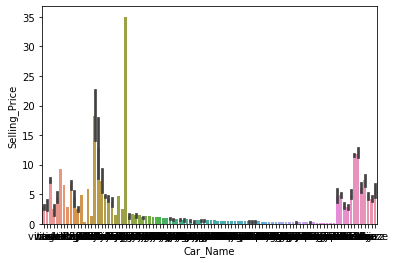

In [36]:
sns.barplot(x='Car_Name', y='Selling_Price', data=car)

Text(0.5, 1.0, 'Fuel_Type vs Selling_Price ')

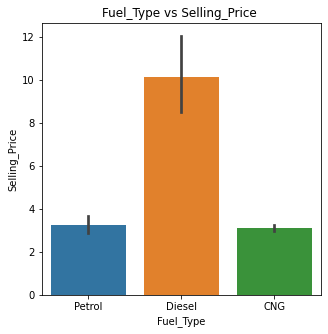

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=car)



<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

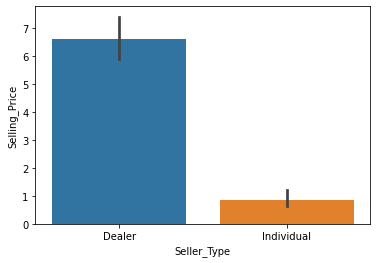

In [37]:
sns.barplot(x='Seller_Type', y='Selling_Price', data=car)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

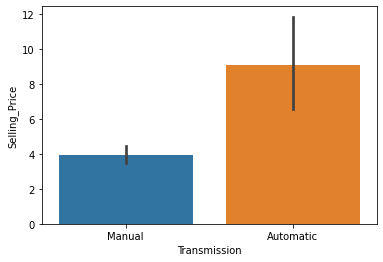

In [35]:
sns.barplot(x='Transmission', y='Selling_Price', data=car)



In [ ]:
##LabelEncoder used to normalise labels.also used to convert non-numberic to numeric levels 
#the data obtained after converting can be provided to the models to give and improve predictions.

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car['Car_Name'] = le.fit_transform(car['Car_Name'])
car['Fuel_Type'] = le.fit_transform(car['Fuel_Type'])
car['Seller_Type'] = le.fit_transform(car['Seller_Type'])
car['Transmission'] = le.fit_transform(car['Transmission'])



C:\Users\HP\AppData\Local\Temp\ipykernel_8952\3253790832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Car_Name'] = le.fit_transform(car['Car_Name'])
C:\Users\HP\AppData\Local\Temp\ipykernel_8952\3253790832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Fuel_Type'] = le.fit_transform(car['Fuel_Type'])
C:\Users\HP\AppData\Local\Temp\ipykernel_8952\3253790832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [41]:
car_categorical=car.loc[:,car.dtypes== object]
car_categorical

""
0
1
2
3
4
...
296
297
298
299


In [42]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


# SCATTER PLOT OF CONTINEOUS FEATUES

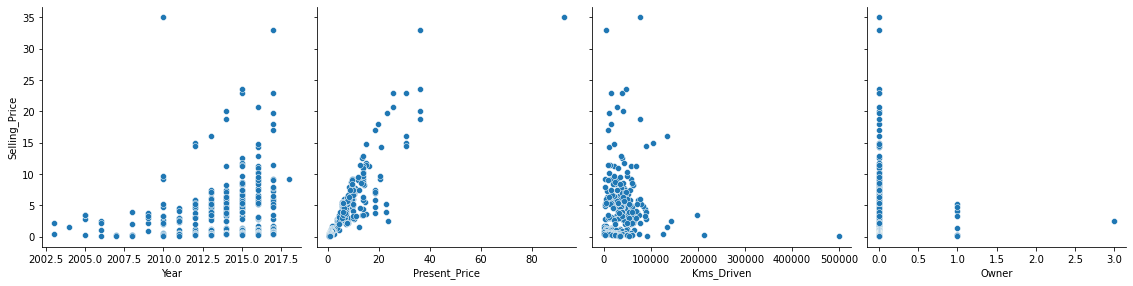

In [44]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(car,
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(car, x_vars=['Year', 'Present_Price', 'Kms_Driven','Owner'], y_vars='Selling_Price', height=4, aspect=1, kind='scatter')
​
<seaborn.axisgrid.PairGrid at  x_vars=['Year', 'Present_Price', 'Kms_Driven','Owner'], y_vars='Selling_Price', height=4, aspect=1, kind='scatter')


In [50]:
# Outlier Analysis

plt1 = sns.boxplot(car['Year'], ax = axs[0,0])
plt2 = sns.boxplot(car['Present_Price'], ax = axs[0,1])
plt3 = sns.boxplot(car['Kms_Driven'], ax = axs[1,0])
plt4 = sns.boxplot(car['Owner'], ax = axs[1,1])


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

<AxesSubplot:>

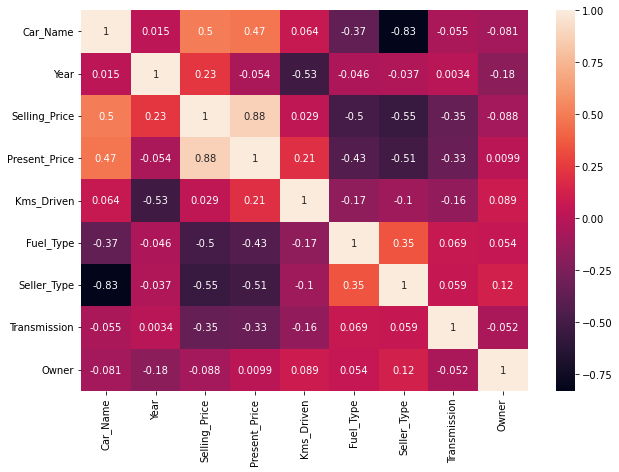

In [45]:
# Let's see the correlation between different variables.
plt.figure(figsize=(10,7))
sns.heatmap(car.corr(), annot = True)

In [46]:
car=car.drop(["Car_Name"],axis=1)

In [47]:
car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


# Model Building
Performing Simple Linear Regression

In [61]:
X = car.drop(['Selling_Price'], axis=1)
y = car.Selling_Price

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [69]:
linreg = LinearRegression()

In [72]:
# fit the model to the training data
linreg.fit(X_train, y_train)

LinearRegression()

In [74]:
#Print out the coefficients of the model
print(linreg.coef_)

[ 3.43074772e-01  4.41316148e-01 -9.36690136e-06 -1.22384843e+00
 -1.28967592e+00 -1.57661832e+00  7.00680277e-01]


In [75]:
##Predicton
pred = linreg.predict(X_test)

In [83]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     293.7
Date:                Sun, 24 Jul 2022   Prob (F-statistic):          6.93e-128
Time:                        16:34:17   Log-Likelihood:                -591.94
No. Observations:                 299   AIC:                             1200.
Df Residuals:                     291   BIC:                             1229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -807.3354     86.937     -9.286

In [ ]:
# R - squared is 0.876
#This is a decent R-squared value & our model s good

# Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [86]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

MAE: 1.541071812283851
MSE: 6.673137446831509
RMSE: 2.583241654749224


# regression plot of the real test values versus the predicted values.


Text(0, 0.5, 'actual price')

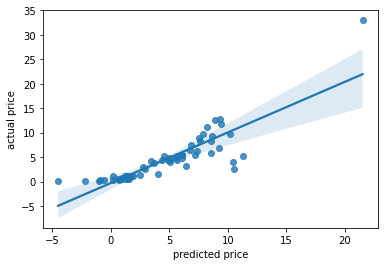

In [87]:
sns.regplot(x=pred,y=y_test)
plt.xlabel("predicted price")
plt.ylabel("actual price")

# Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

sns.distplot((y_test-pred))
sns.distplot((y_test-pred))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

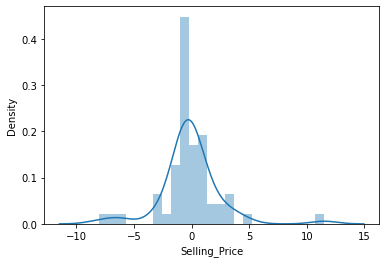

In [88]:
sns.distplot((y_test-pred))

In [ ]:
##The residuals are following the normally distributed with a mean 0. All good!